In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [4]:
def to_celsius (x):
    return round ((x - 32.0) / 1.8, 1)

In [5]:
csvfile  = '48142_Swordfish.txt'
foodtype = 'Swordfish'

In [6]:
df = pd.read_csv (csvfile, usecols=[8,12,13], 
                  parse_dates=True, infer_datetime_format=True)

In [7]:
#df.head(20)

In [8]:
df['ActualTime']  = df['ActualTime'].apply(pd.to_datetime)
df['ActualTemp']  = df['ActualTemp'].apply(to_celsius)
df['ElapsedTime'] = (df['ActualTime'] - df['ActualTime'].iloc[0]).astype("timedelta64[m]")

In [9]:
#df.head(4)

In [10]:
df = df.drop(['ActualTime'], axis=1)
cols = ['ElapsedTime', 'ActualTemp', 'ProbeNumber']
df = df[cols]

In [11]:
#df.head ()

In [12]:
food = df[df["ProbeNumber"]==1].drop (['ProbeNumber'], axis=1)
bath = df[df["ProbeNumber"]==2].drop (['ProbeNumber'], axis=1)

food.rename (columns={'ActualTemp': foodtype}, inplace=True)
bath.rename (columns={'ActualTemp': 'Bath'},   inplace=True)

all = pd.merge(food, bath, on='ElapsedTime')

In [13]:
#all.head (30)

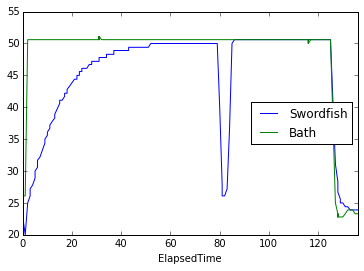

In [14]:
all.plot(x='ElapsedTime', y=[foodtype, 'Bath'])

In [15]:
plt.show()

In [16]:
all.describe()

,ElapsedTime,Swordfish,Bath
count,349.000000,349.000000,349.000000
mean,67.401146,45.368481,48.527507
std,39.183544,8.387490,7.173053
min,0.000000,20.000000,22.800000
25%,34.000000,45.000000,50.600000
50%,68.000000,50.000000,50.600000
75%,100.000000,50.600000,50.600000
max,136.000000,50.600000,51.100000


In [19]:
from bqplot import *

In [18]:
all.to_csv ('swordfish-one-inch.txt')

In [ ]:
x_sc = LinearScale()
y_sc = LinearScale()

In [ ]:
ax_x = Axis(label='Elapsed Time', scale=x_sc, grid_lines='solid')
ax_y = Axis(label='Temperature',  scale=y_sc, orientation='vertical', grid_lines='solid')

line = Lines(x=all['ElapsedTime'], y=[all['Swordfish'], all['Bath']], scales={'x': x_sc, 'y': y_sc})
fig = Figure(axes=[ax_x, ax_y], marks=[line], title='First Example')
fig

In [ ]:
fig.show()